## Read in python libraries for exercise

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###  ~/Doc plus tab will auto-populate the Documnets directory

In [2]:

#Read in the csv file and show the first 10 rows
data = pd.read_csv('/Users/Matt/Documents/PythonWalk-Through/data/Advertising.csv')
data.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


# Remove a column from a dataframe

In [3]:
#Remove the column "Unnamed: 0" from the dataset. This is a duplicate index field and is not needed.

data.drop('Unnamed: 0', axis=1, inplace=True)

data.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


## Create a correlation matrix 

In [4]:
data.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Text(0.5, 1, 'Correlation Map')

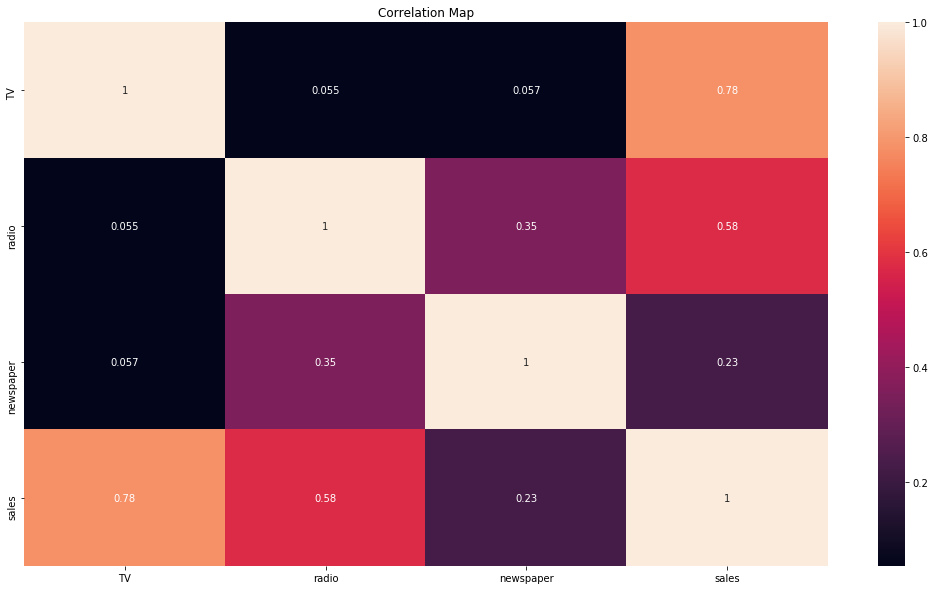

In [5]:
#correlation heatmap
plt.figure(figsize=(18,10))

sns.heatmap(data.corr(),annot=True)
plt.title("Correlation Map")

## What did we learn?

    -all three media outlets appear to have a positive relationship with sales. Let's plot out the relationships
    to determine if that relationship is linear

Text(0.5, 1, 'Newspaper on Sales')

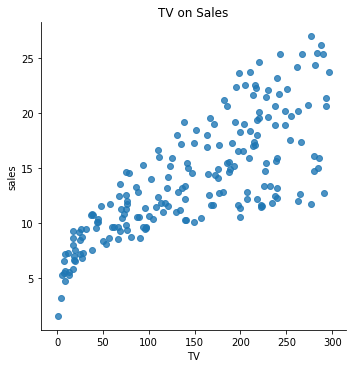

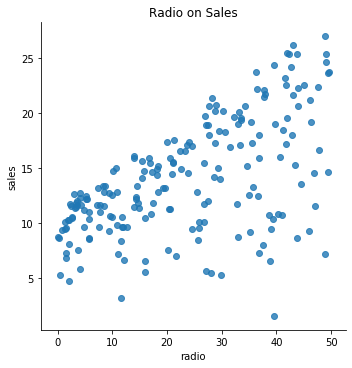

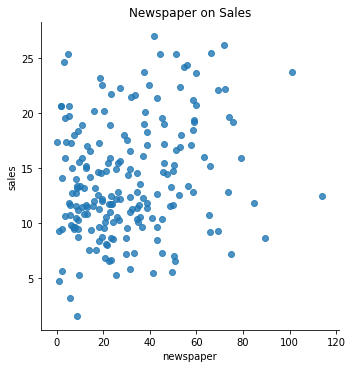

In [6]:


sns.lmplot(x='TV',y='sales',data=data,fit_reg=False)
plt.title('TV on Sales')
print('\n')
sns.lmplot(x='radio',y='sales',data=data,fit_reg=False)
plt.title('Radio on Sales')


print('\n')
sns.lmplot(x='newspaper',y='sales',data=data,fit_reg=False)
plt.title('Newspaper on Sales')


### We can see that both tv and radio have linear relationships with sales; however, newspaper does not have this relationship. The correlation matrix also tells us that newspaper is highly correlated with radio advertising. The multi-colinearity may explain why newspaper is correlated with sales. 
    - multicollinearity (also collinearity) is a phenomenon in which two or more predictor variables in a multiple regression model are highly correlated, meaning that one can be linearly predicted from the others with a substantial degree of accuracy. In this situation the coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data. Multicollinearity does not reduce the predictive power or reliability of the model as a whole, at least within the sample data set; it only affects calculations regarding individual predictors. That is, a multiple regression model with correlated predictors can indicate how well the entire bundle of predictors predicts the outcome variable, but it may not give valid results about any individual predictor, or about which predictors are redundant with respect to others.

### Histograms and Boxplots
    -The box and whisker plot is a chart that graphically represents the five most important 
    descriptive value ofany dataset.
    1.) minimum value
    2.) first quartile (25%)
    3.) median
    4.) third quartile (75%)
    5.) maximum value
    
    -The histogram is a type of bar chart that graphically displays the frequencies of a dataset. It plots the raw count on the Y-axis and the variable being measured on the x-axis. 

In [7]:
def BW(df,column):
    sns.boxplot(df[column])
    plt.show()
    
    

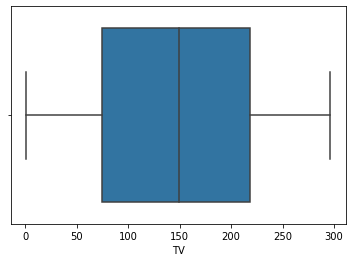

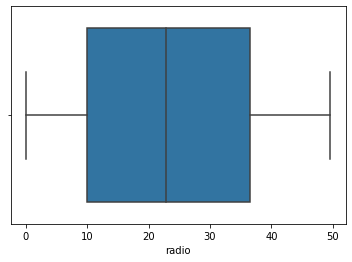

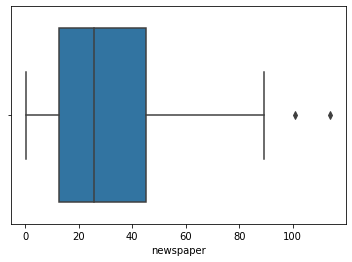

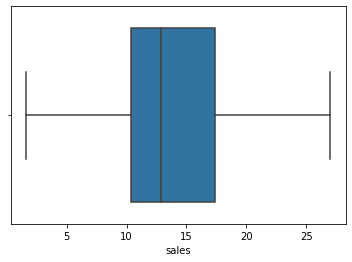

In [8]:
for i in data.columns:
    BW(data,i)
    print('\n')

In [9]:

def Hist_Box(data,column, n_bins, graph='hist'):
    


    """
    input the dataframe and the column you wish to output the boxplot or histogram statistics and graphic
    
    """
    
    if graph=='box':
    
        print('The min for the {} variable is {} \n'.format(column,data[column].min()))
        print('Quartile 1 for the {} variable is {} \n'.format(column,np.quantile(data[column], .25)))
        print('Median for the {} variable is {} \n'.format(column,data[column].median()))
        print('Quartile 3 for the {} variable is {} \n'.format(column,np.quantile(data[column], .75)))
        print('The max for the {} variable is {} \n'.format(column,data[column].max()))


        plt.title('Box and Whisker Plot')
        sns.boxplot(x=data[column])
        
    elif graph=='hist' :
        
        #group data into bins
        bins = np.linspace(data[column].min(), data[column].max(), n_bins-1)
        groups = data.groupby(pd.cut(data[column], n_bins))
        print(groups[column].count())
        
        plt.title('Histogram')
        data[column].hist(bins=n_bins)
        

The min for the TV variable is 0.7 

Quartile 1 for the TV variable is 74.375 

Median for the TV variable is 149.75 

Quartile 3 for the TV variable is 218.825 

The max for the TV variable is 296.4 



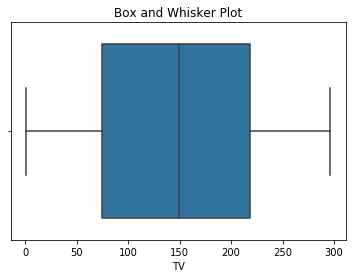

In [10]:

##Call function
Hist_Box(data,'TV',20,graph='box')

<br>

TV
(0.404, 15.485]      11
(15.485, 30.27]      15
(30.27, 45.055]       9
(45.055, 59.84]       6
(59.84, 74.625]       9
(74.625, 89.41]      12
(89.41, 104.195]     10
(104.195, 118.98]     8
(118.98, 133.765]     8
(133.765, 148.55]    11
(148.55, 163.335]     5
(163.335, 178.12]    12
(178.12, 192.905]     8
(192.905, 207.69]    14
(207.69, 222.475]    17
(222.475, 237.26]     9
(237.26, 252.045]    13
(252.045, 266.83]     7
(266.83, 281.615]     7
(281.615, 296.4]      9
Name: TV, dtype: int64


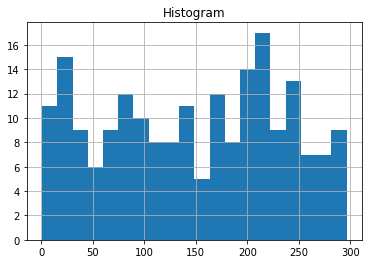

In [11]:
Hist_Box(data,'TV',20,graph='hist')

# Simple Least Squares Regression Model


$$ f(y) = B_0 + B_1 * X_1 $$ 



### Slope:

$$ B_1 = \frac{\sum_{i=1}^n (xi - xhat)(yi - yhat)}{\sum_{i=1}^n (xi - xhat)^2}$$


### Intercept:

$$ B_0 = yhat - B_1 * xhat$$


### Residual Sum of Sqaures
$$ RSS = e^2_1 + e^2_2 +.....+e^2_n$$

In [12]:
split_val = round(len(data)*.8)

train_df =data[['TV','sales']].iloc[:split_val]
test_df =data[['TV','sales']].iloc[split_val:]


In [13]:
print(data[['TV','sales']].head())
print('\n')

y = data['sales']
X = data['TV']

X_mean = X.mean()
y_mean = y.mean()

for x_, y_  in zip(X,y):
    
    print(x_," ", y_)

      TV  sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


230.1   22.1
44.5   10.4
17.2   9.3
151.5   18.5
180.8   12.9
8.7   7.2
57.5   11.8
120.2   13.2
8.6   4.8
199.8   10.6
66.1   8.6
214.7   17.4
23.8   9.2
97.5   9.7
204.1   19.0
195.4   22.4
67.8   12.5
281.4   24.4
69.2   11.3
147.3   14.6
218.4   18.0
237.4   12.5
13.2   5.6
228.3   15.5
62.3   9.7
262.9   12.0
142.9   15.0
240.1   15.9
248.8   18.9
70.6   10.5
292.9   21.4
112.9   11.9
97.2   9.6
265.6   17.4
95.7   9.5
290.7   12.8
266.9   25.4
74.7   14.7
43.1   10.1
228.0   21.5
202.5   16.6
177.0   17.1
293.6   20.7
206.9   12.9
25.1   8.5
175.1   14.9
89.7   10.6
239.9   23.2
227.2   14.8
66.9   9.7
199.8   11.4
100.4   10.7
216.4   22.6
182.6   21.2
262.7   20.2
198.9   23.7
7.3   5.5
136.2   13.2
210.8   23.8
210.7   18.4
53.5   8.1
261.3   24.2
239.3   15.7
102.7   14.0
131.1   18.0
69.0   9.3
31.5   9.5
139.3   13.4
237.4   18.9
216.8   22.3
199.1   18.3
109.8   12.4
26.8   8.

In [14]:
## Split data into dependent and independent variables. We'll use "sales" and "TV"

y_train = train_df['sales']
X_train = train_df['TV']



y_test = test_df['sales']
X_test = test_df['TV']

def Slope(X,Y):
    numerator = [(x_ - X.mean())*(y_ - Y.mean()) for x_,y_ in zip(X,Y)]
    numerator = sum(numerator)
    denominator = [(x_ - X.mean())**2 for x_ in X]
    denominator = sum(denominator)
    coeff = numerator/denominator
    return coeff



def Intercept(y,x,slope):
    intercept = y.mean()- (slope*x.mean())
    return intercept



In [15]:
slope = Slope(X_train,y_train)
intercept = Intercept(y_train,X_train,slope)

print(slope)

0.048935660411275395


In [16]:
def predict(slope,intercept,X):
    yhat = (X*slope)+intercept
    return yhat



lrprediction = predict(slope,intercept,X_test)

In [17]:
preds_vs_actual = pd.DataFrame({'Predictions':prediction, "Actual":y_test})
preds_vs_actual.plot()
plt.xlim(160,170)

NameError: name 'prediction' is not defined

In [20]:

def RSE(y,yhat,degOfFreedom):
    
    ##degOfFreedom is n - (count(independentvars) + 1)
    error = (y-yhat)**2
    return np.sqrt(sum(error)/degOfFreedom)




print(RSE(y_test,lrprediction,158))






def SSE_ConfiIterval(yhat,indvar,y,slope):
    '''
    This is an estimate for the slope coefficient.
    
    This calcs the SSE of B1 and the confidence interval
    '''
    
    error = y-yhat
    numerator = error.var()
    denominator = [(x-indvar.mean())**2 for x in indvar]
    SSE=np.sqrt(numerator/sum(denominator))
    lowerCoef = slope- (2*SSE)
    upperCoef = slope + (2*SSE)
    
    #confidence interval
    confidenceInt = [lowerCoef,upperCoef]
    
    #t-statistic
    
    t_stat = slope/SSE
    return (t_stat,confidenceInt)

1.8912698394872183


In [21]:
SSE_ConfiIterval(lrprediction,data['TV'],data['sales'],slope)

(16.44365650731401, [0.0429837408501353, 0.05488757997241549])

In [22]:
import statsmodels.api as sm


In [23]:
OLS = sm.OLS(y_train,sm.add_constant(X_train)).fit()


//anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [24]:
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     284.6
Date:                Tue, 10 Mar 2020   Prob (F-statistic):           3.58e-37
Time:                        13:45:12   Log-Likelihood:                -408.80
No. Observations:                 160   AIC:                             821.6
Df Residuals:                     158   BIC:                             827.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0688      0.483     14.634      0.000       6.115       8.023
TV             0.0489      0.003     16.871      0.000       0.043       0.055
==============================================================================
Omnibus:                        1.575   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.455   Jarque-Bera (JB):                1.414
Skew:                          -0.230   Prob(JB):                        0.493
Kurtosis:                       3.002   Cond. No.                         325.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
OLS.cov_params()

,const,TV
const,0.233336,-0.001203
TV,-0.001203,0.000008


In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rfr = RandomForestRegressor(n_estimators=50)


In [28]:
rfr.fit(np.array(X_train).reshape(-1,1),y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [34]:
rfrPrediction = rfr.predict(np.array(X_test).reshape(-1,1))

In [35]:
preds_vs_actual = pd.DataFrame({'RFR_Predictions':rfrPrediction, 'LR_Prediction':lrprediction ,"Actual":y_test})


In [36]:
preds_vs_actual['RFR_Predictions'] -preds_vs_actual['RFR_Predictions'] 

,RFR_Predictions,LR_Prediction,Actual
160,17.284000,15.510179,14.4
161,11.076000,11.262564,13.3
162,15.006000,16.288256,14.9
163,17.230000,15.069758,18.0
164,11.876000,12.804037,11.9
165,16.339733,18.544190,11.9
166,8.524000,7.944726,8.0
167,15.516000,17.188672,12.2
168,18.736000,17.609519,17.1
169,21.946000,20.981186,15.0


In [37]:
print(RSE(preds_vs_actual['Actual'],preds_vs_actual['RFR_Predictions'],158))


2.0574704979983585


In [38]:
print(RSE(preds_vs_actual['Actual'],preds_vs_actual['LR_Prediction'],158))


1.8912698394872183
